In [201]:
import tensorflow as tf
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import os
from IPython.display import display, clear_output

In [202]:
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.runtime.config import Inifile
import numpy as np
import pandas as pd


# N:B The start vector for params_fiducial was all set at the middle point 

#################################################
# Read in the cosmosis configuration file pipeline.ini 
inifile = 'pipeline11.ini'
ini = Inifile(inifile) 
#################################################

##################################################
# (optional) You can change things or read from ini: 

# set the value of MY_PATH in the [DEFAULT] section to /Users/username/Documents/repos/
# ini.set("DEFAULT","MY_PATH","/Users/username/Documents/repos/")

# get the value of modules in the [pipeline] section
# ini.get("pipeline","modules")

# ini.set("pipeline","modules","sample_S8 sigma8toAs camb")
####################################################

####################################################
# setup the pipeline and give it the ini values
pipeline = LikelihoodPipeline(ini)
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params


# # You can modify which parameters you vary or fix
# pipeline.set_varied("cosmological_parameters", "omch2", 0.2, 0.4)
# pipeline.set_fixed("cosmological_parameters", "h0", 0.72) 

Loading number density data from /Users/apple/Downloads//cosebis_KIDS1000_BlindC_with_m_bias_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_goldclasses_Flag_SOM_Fid.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 5 bins
        Putting n(0) = 0 at the start of the n(z)
Calculating Limber: Kernel 1 = ('F', 'source'), Kernel 2 = ('F', 'source'), P_3D = MatterPower3D  --> Output: shear_cl
Will project these spectra into 2D:
    -  shear_cl




*********in COSEBIs interface setup*********

Could not load input_section_name to COSEBIs,setting to default: shear_cl
got the value of output_section_name:cosebis
Caluclating E-modes
got the value of theta_min=0.5
got the value of theta_max=300
got the value of n_max=5
not using c_term correction
WnLog folder name is:/Users/apple/Downloads//WnLog/
Root and Norms folder name is:/Users/apple/Downloads//cosebis_cosmosis//TLogsRootsAndNorms/
T_pm folder name is:/Users/apple/Downloads//cosebis_cosmosis//TpnLog/
in COSEBIs initialize
setting En parameters in COSEBIs
nMaximum=5
theta_min=0.000145444
theta_max=0.0872665
Wn not set setting now:
setting thetamin,thetamax,nMax
nMax=5
reading T1  roots	reading T1  normalization
reading T2  roots	reading T2  normalization
reading T3  roots	reading T3  normalization
reading T4  roots	reading T4  normalization
reading T5  roots	reading T5  normalization
set order of WnLog
LLOW=0 LHIGH=11.6491 NLBINS=1000000
log [0,11.6491] N=1000000)
set order of

Setup all pipeline modules
Module timing:
sample_S8 0.033107
sigma8toAs 0.042786
camb 0.050396
load_nz_fits 0.079672
extrapolate_power 0.016595
linear_alignment 0.017876
projection 0.022672
cosebis 11.991677

Parameter Priors
----------------
cosmological_parameters--omch2      ~ U(0.051, 0.255)
cosmological_parameters--ombh2      ~ U(0.019, 0.026)
cosmological_parameters--h0         ~ U(0.64, 0.82)
cosmological_parameters--n_s        ~ U(0.84, 1.1)
cosmological_parameters--s_8_input  ~ U(0.1, 1.3)
cosmological_parameters--omega_k    ~ delta(0.0)
cosmological_parameters--w          ~ delta(-1.0)
cosmological_parameters--wa         ~ delta(0.0)
cosmological_parameters--mnu        ~ delta(0.06)
halo_model_parameters--logt_agn     ~ U(7.6, 8.0)
intrinsic_alignment_parameters--a   ~ U(-6.0, 6.0)

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.853 seconds
camb took: 6.369 seconds
load_nz_fits took: 0.002 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.005 seconds
pr

In [251]:
n_params = 7
n_samples = 100 

# parameter ranges

omch2=      np.linspace(0.051, 0.051, n_samples)
ombh2 =     np.linspace(0.019,    0.019,   n_samples)
h0 =         np.linspace(0.64,    0.64,    n_samples)
n_s =        np.linspace(0.84,    0.84,    n_samples)
s8_input =      np.linspace(0.1,    1.3,    n_samples)
halo_model =      np.linspace(7.6,      7.6,    n_samples)
intrinsic_A =      np.linspace(-6.0,     -6.0,    n_samples) 


In [204]:
df = pd.DataFrame([omch2, ombh2, h0, n_s, s8_input, halo_model, intrinsic_A]).T 

In [205]:
df.columns = ['omch2', 'ombh2', 'h0','n_s', 's8_input', 'halo_model', 'intrinsic_A'] 

In [255]:
df.head() 

,omch2,ombh2,h0,n_s,s8_input,halo_model,intrinsic_A
0,0.051,0.019,0.64,0.84,0.100000,7.6,-6.0
1,0.051,0.019,0.64,0.84,0.112121,7.6,-6.0
2,0.051,0.019,0.64,0.84,0.124242,7.6,-6.0
3,0.051,0.019,0.64,0.84,0.136364,7.6,-6.0
4,0.051,0.019,0.64,0.84,0.148485,7.6,-6.0


In [207]:
df.shape

(100, 7)

In [256]:
x_= df["s8_input"][0:80]
x_

0     0.100000
1     0.112121
2     0.124242
3     0.136364
4     0.148485
        ...   
75    1.009091
76    1.021212
77    1.033333
78    1.045455
79    1.057576
Name: s8_input, Length: 80, dtype: float64

In [208]:
x_label_N = df["s8_input"][0:80]

# Saving the parameters into dict of np.array for each key of the cosmological parameters
from numpy import savez_compressed 
savez_compressed("training_parameters.npz", **x_label_N) 

In [209]:
# Loading/Reading the saved file
training_parameters  = np.load("training_parameters.npz",allow_pickle=True)

In [210]:
print("Cosmological Paramters in the training set are: ", training_parameters.files)

Cosmological Paramters in the training set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


In [211]:
print(training_parameters['omch2'])
print('number of training samples: ', len(training_parameters['omch2'])) # same for all of the other parameters

[0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051]
number of training samples:  80


In [212]:
print(training_parameters['s8_input'])
print('number of training samples: ', len(training_parameters['s8_input'])) # same for all of the other parameters

[0.1        0.11212121 0.12424242 0.13636364 0.14848485 0.16060606
 0.17272727 0.18484848 0.1969697  0.20909091 0.22121212 0.23333333
 0.24545455 0.25757576 0.26969697 0.28181818 0.29393939 0.30606061
 0.31818182 0.33030303 0.34242424 0.35454545 0.36666667 0.37878788
 0.39090909 0.4030303  0.41515152 0.42727273 0.43939394 0.45151515
 0.46363636 0.47575758 0.48787879 0.5        0.51212121 0.52424242
 0.53636364 0.54848485 0.56060606 0.57272727 0.58484848 0.5969697
 0.60909091 0.62121212 0.63333333 0.64545455 0.65757576 0.66969697
 0.68181818 0.69393939 0.70606061 0.71818182 0.73030303 0.74242424
 0.75454545 0.76666667 0.77878788 0.79090909 0.8030303  0.81515152
 0.82727273 0.83939394 0.85151515 0.86363636 0.87575758 0.88787879
 0.9        0.91212121 0.92424242 0.93636364 0.94848485 0.96060606
 0.97272727 0.98484848 0.9969697  1.00909091 1.02121212 1.03333333
 1.04545455 1.05757576]
number of training samples:  80


## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our training parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 400 samples hence

In [213]:
# Converting to list
training_feature = x_label_N.values.tolist()   

In [214]:
%%time
# Passing the list of the training features to generate cosebis emodes for the 120 samples 

final_list = list() 
for values in training_feature:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.716 seconds
camb took: 5.383 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.850 seconds
cosebis took: 0.585 seconds
Total pipeline time: 7.61 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.475 seconds
camb took: 8.121 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.118 seconds
linear_alignment took: 0.007 seconds
projection took: 1.110 seconds
cosebis took: 0.611 seconds
Total pipeline time: 10.4 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.515 seconds
camb took: 7.115 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.181 seconds
linear_alignment took: 0.011 seconds
projection took: 1.515 seconds
cosebis took: 0.567 seconds
Total pipeline time: 9.91 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.470 seconds
camb took: 4.491 seco

sigma8toAs took: 0.481 seconds
camb took: 4.470 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 0.751 seconds
cosebis took: 0.551 seconds
Total pipeline time: 6.33 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.500 seconds
camb took: 4.862 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.757 seconds
cosebis took: 0.551 seconds
Total pipeline time: 6.74 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.473 seconds
camb took: 4.424 seconds
load_nz_fits took: 0.002 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.006 seconds
projection took: 0.759 seconds
cosebis took: 0.548 seconds
Total pipeline time: 6.28 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.471 seconds
camb took: 4.494 seconds
load_nz_fits took: 0.000 s

sigma8toAs took: 0.624 seconds
camb took: 7.139 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.084 seconds
linear_alignment took: 0.006 seconds
projection took: 1.090 seconds
cosebis took: 0.682 seconds
Total pipeline time: 9.63 seconds
Pipeline ran okay.
sample_S8 took: 0.002 seconds
sigma8toAs took: 0.539 seconds
camb took: 5.646 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.078 seconds
linear_alignment took: 0.005 seconds
projection took: 1.048 seconds
cosebis took: 1.083 seconds
Total pipeline time: 8.4 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.500 seconds
camb took: 6.392 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.070 seconds
linear_alignment took: 0.005 seconds
projection took: 0.808 seconds
cosebis took: 0.661 seconds
Total pipeline time: 8.44 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.746 seconds
camb took: 5.782 seconds
load_nz_fits took: 0.001 se

In [215]:
COSEBIs_E_modes = []
for i in final_list:
    if len(i) == 75:
        COSEBIs_E_modes.append(i)
         
len(COSEBIs_E_modes)

80

In [216]:
COSEBIs_E_modes = pd.Series(data=COSEBIs_E_modes) 
COSEBIs_E_modes = pd.DataFrame({"features" : np.array(COSEBIs_E_modes), 
                                         "modes" : list(range(0,80)) })  

In [269]:
COSEBIs_E_modes

,features,modes
0,"[1.3923430942220205e-11, 2.5246269348866233e-1...",0
1,"[1.7505809222978335e-11, 3.1726208649962024e-1...",1
2,"[2.150998173140803e-11, 3.894491907377061e-11,...",2
3,"[2.5947865836593757e-11, 4.690691342805987e-11...",3
4,"[3.08356482663955e-11, 5.5620304849546974e-11,...",4
...,...,...
75,"[3.806611252779414e-09, 4.056084524117594e-09,...",75
76,"[3.934538568789601e-09, 4.184914870827825e-09,...",76
77,"[4.064824216706579e-09, 4.316168672635055e-09,...",77
78,"[4.1976667181505465e-09, 4.450108186500349e-09...",78


In [218]:
### Saving the cosebis_Emodes 
training_COSEBIs_E_modes = COSEBIs_E_modes.to_dict(orient="list")  
savez_compressed("training_COSEBIs_E_modes.npz", **training_COSEBIs_E_modes) 

In [219]:
### Loading/Reading Cosebis

training_COSEBIs_E_modes = np.load("training_COSEBIs_E_modes.npz", allow_pickle=True)  

In [220]:
training_COSEBIs_E_modes.files

['features', 'modes']

In [221]:
len(training_COSEBIs_E_modes["features"])

80

In [222]:
print(training_COSEBIs_E_modes["features"])

[[1.39234309e-11 2.52462693e-11 2.81239496e-11 ... 5.80697017e-11
  3.99794888e-11 2.17432130e-11]
 [1.75058092e-11 3.17262086e-11 3.53466101e-11 ... 7.30009397e-11
  5.02609826e-11 2.73333890e-11]
 [2.15099817e-11 3.89449191e-11 4.33852389e-11 ... 8.96360268e-11
  6.17183465e-11 3.35630247e-11]
 ...
 [4.06482422e-09 4.31616867e-09 2.67105740e-09 ... 5.33781665e-09
  3.90420657e-09 2.36571077e-09]
 [4.19766672e-09 4.45010819e-09 2.73482576e-09 ... 5.44516473e-09
  3.98409204e-09 2.42124897e-09]
 [4.33281513e-09 4.58642402e-09 2.79946916e-09 ... 5.55303649e-09
  4.06427304e-09 2.47730773e-09]]


In [223]:
# We are going to use variable COSEBIs declare here to train our cosmopower 
COSEBIs =training_COSEBIs_E_modes['features'] 
print('(number of training samples, number of ell modes): ', COSEBIs.shape) 

(number of training samples, number of ell modes):  (80, 75)


In [224]:
# We are you to use list of output nodes declare here to train our cosmopower
output_modes = (training_COSEBIs_E_modes['modes'][:75]) 
print('number of multipoles: ', output_modes.shape) 

number of multipoles:  (75,)


## TESTING DATA

In [225]:
# Declaring the Testing parameters
test_parameters = df[80:100]  

In [226]:
test_params_dict = test_parameters.to_dict(orient="list") 

# Saving the test_params_dict
savez_compressed("test_params.npz", **test_params_dict) 

In [227]:
#Loading/Reading of test_params
test_params = np.load("test_params.npz",allow_pickle=True ) 

In [228]:
test_params.files

['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']

In [229]:
print(test_params['omch2'])
print('number of training samples: ', len(test_params['omch2'])) # same for all of the other parameters

[0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051
 0.051 0.051 0.051 0.051 0.051 0.051 0.051 0.051]
number of training samples:  20


In [230]:
print("Cosmological Paramters in the test set are: ", test_params.files)

Cosmological Paramters in the test set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


## Feature Files/ Cosebis_Emodes

In [231]:
# Creating testing parameters
test_set = test_parameters.values.tolist() 

In [232]:
%%time

# Passing the list of the training features to generate cosebis emodes for the 120 samples 


final_list = list() 
for values in test_set:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0 
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.531 seconds
camb took: 9.457 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.087 seconds
linear_alignment took: 0.007 seconds
projection took: 1.388 seconds
cosebis took: 1.150 seconds
Total pipeline time: 12.6 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.618 seconds
camb took: 10.861 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.112 seconds
linear_alignment took: 0.008 seconds
projection took: 1.555 seconds
cosebis took: 1.293 seconds
Total pipeline time: 14.4 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.831 seconds
camb took: 11.818 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.082 seconds
linear_alignment took: 0.007 seconds
projection took: 1.457 seconds
cosebis took: 0.883 seconds
Total pipeline time: 15.1 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.686 seconds
camb took: 11.773 s

In [233]:
# Filtering: Appending all the length of np. array at full node for all the bins of all 5 Redshift
testing_COSEBIs_E_modes = []
for i in final_list: 
    if len(i) == 75:
        testing_COSEBIs_E_modes.append(i)
        
len(testing_COSEBIs_E_modes)

20

In [234]:
testing_COSEBIs_E_modes

[array([4.47065985e-09, 4.72560445e-09, 2.86533816e-09, 1.82256821e-09,
        1.45335249e-09, 2.81840619e-09, 2.99901874e-09, 1.95102018e-09,
        1.34640428e-09, 1.01265749e-09, 2.78258828e-09, 2.96746712e-09,
        1.90211358e-09, 1.27358518e-09, 9.59197777e-10, 2.98668654e-09,
        3.18406377e-09, 2.04232584e-09, 1.36996256e-09, 1.03301396e-09,
        3.20765460e-09, 3.41776940e-09, 2.20360283e-09, 1.49108666e-09,
        1.12204310e-09, 3.46274498e-09, 3.71870222e-09, 2.72580043e-09,
        2.11197190e-09, 1.46254230e-09, 2.99070155e-09, 3.23614121e-09,
        2.35946607e-09, 1.77371011e-09, 1.20226950e-09, 3.15887771e-09,
        3.41401204e-09, 2.48233710e-09, 1.86809822e-09, 1.27465742e-09,
        3.55888841e-09, 3.84739623e-09, 2.81976994e-09, 2.13807617e-09,
        1.45200070e-09, 3.55851433e-09, 3.93083583e-09, 2.97778047e-09,
        2.18072137e-09, 1.35129712e-09, 3.75737857e-09, 4.15882973e-09,
        3.15002245e-09, 2.29647496e-09, 1.42698574e-09, 4.154503

In [235]:
# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters = ['omch2', 
                    'ombh2', 
                    'h0', 
                    'n_s', 
                    's8_input', 
                    'halo_model',
                    "intrinsic_A"
                    ] 

In [236]:
output_modes = list(range(1,76))

In [290]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [16, 16, 16], # 4 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      )   


Initialized cosmopower_NN model, 
mapping 7 input parameters to 75 output modes, 
using 3 hidden layers, 
with [16, 16, 16] nodes, respectively. 



In [291]:
%%time 
cp_nn.train(training_parameters=training_parameters,
                training_features=COSEBIs,
                filename_saved_model='cosmosis_model_v2',
                # cooling schedule 
                validation_split=0.1, 
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 10%|███                            | 99/1000 [00:03<00:36, 24.98it/s, loss=nan]


Validation loss = inf
Model saved.
Reached max number of epochs. Validation loss = inf
Model saved.
learning rate = 0.001, batch size = 1024


 10%|███                            | 99/1000 [00:03<00:28, 31.08it/s, loss=nan]


Validation loss = inf
Model saved.
Reached max number of epochs. Validation loss = inf
Model saved.
learning rate = 0.0001, batch size = 1024


 10%|███                            | 99/1000 [00:03<00:29, 31.03it/s, loss=nan]


Validation loss = inf
Model saved.
Reached max number of epochs. Validation loss = inf
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|███                            | 99/1000 [00:02<00:25, 34.67it/s, loss=nan]


Validation loss = inf
Model saved.
Reached max number of epochs. Validation loss = inf
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|███                            | 99/1000 [00:03<00:36, 25.00it/s, loss=nan]


Validation loss = inf
Model saved.
Reached max number of epochs. Validation loss = inf
Model saved.
CPU times: user 7.81 s, sys: 1.04 s, total: 8.86 s
Wall time: 17.5 s


In [280]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='cosmosis_model_v2',
                      ) 

In [281]:
predicted_COSEBIs_Emodes = cp_nn.predictions_np(test_params)
predicted_COSEBIs_Emodes

/Users/apple/base/lib/python3.9/site-packages/cosmopower/cosmopower_NN.py:329: RuntimeWarning: invalid value encountered in true_divide
  layers = [(parameters_arr - self.parameters_mean_)/self.parameters_std_]


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [282]:
predicted_COSEBIs_Emodes[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [283]:
testing_COSEBIs_E_modes[0]

array([4.47065985e-09, 4.72560445e-09, 2.86533816e-09, 1.82256821e-09,
       1.45335249e-09, 2.81840619e-09, 2.99901874e-09, 1.95102018e-09,
       1.34640428e-09, 1.01265749e-09, 2.78258828e-09, 2.96746712e-09,
       1.90211358e-09, 1.27358518e-09, 9.59197777e-10, 2.98668654e-09,
       3.18406377e-09, 2.04232584e-09, 1.36996256e-09, 1.03301396e-09,
       3.20765460e-09, 3.41776940e-09, 2.20360283e-09, 1.49108666e-09,
       1.12204310e-09, 3.46274498e-09, 3.71870222e-09, 2.72580043e-09,
       2.11197190e-09, 1.46254230e-09, 2.99070155e-09, 3.23614121e-09,
       2.35946607e-09, 1.77371011e-09, 1.20226950e-09, 3.15887771e-09,
       3.41401204e-09, 2.48233710e-09, 1.86809822e-09, 1.27465742e-09,
       3.55888841e-09, 3.84739623e-09, 2.81976994e-09, 2.13807617e-09,
       1.45200070e-09, 3.55851433e-09, 3.93083583e-09, 2.97778047e-09,
       2.18072137e-09, 1.35129712e-09, 3.75737857e-09, 4.15882973e-09,
       3.15002245e-09, 2.29647496e-09, 1.42698574e-09, 4.15450347e-09,
      

In [284]:
predicted_COSEBIs_Emodes[1]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [285]:
testing_COSEBIs_E_modes[1]

array([4.61095386e-09, 4.86735742e-09, 2.93222899e-09, 1.84724546e-09,
       1.47596970e-09, 2.90474168e-09, 3.08437279e-09, 1.99283646e-09,
       1.36634404e-09, 1.03073059e-09, 2.86830180e-09, 3.05317408e-09,
       1.94429257e-09, 1.29254071e-09, 9.75863514e-10, 3.07861968e-09,
       3.27588357e-09, 2.08746899e-09, 1.39030564e-09, 1.05097008e-09,
       3.30613944e-09, 3.51574872e-09, 2.25172791e-09, 1.51318344e-09,
       1.14169450e-09, 3.56343719e-09, 3.81284339e-09, 2.77494336e-09,
       2.14578520e-09, 1.49276733e-09, 3.07783531e-09, 3.31905737e-09,
       2.40386547e-09, 1.80303887e-09, 1.22712361e-09, 3.25102719e-09,
       3.50166503e-09, 2.52902794e-09, 1.89878968e-09, 1.30087195e-09,
       3.66224951e-09, 3.94518824e-09, 2.87203427e-09, 2.17322607e-09,
       1.48204989e-09, 3.65966330e-09, 4.02801083e-09, 3.03456084e-09,
       2.22034018e-09, 1.38110669e-09, 3.86409395e-09, 4.26173158e-09,
       3.21054437e-09, 2.33847424e-09, 1.45840402e-09, 4.27224753e-09,
      

In [286]:
len(predicted_COSEBIs_Emodes) 

20

In [287]:
len(testing_COSEBIs_E_modes) 

20

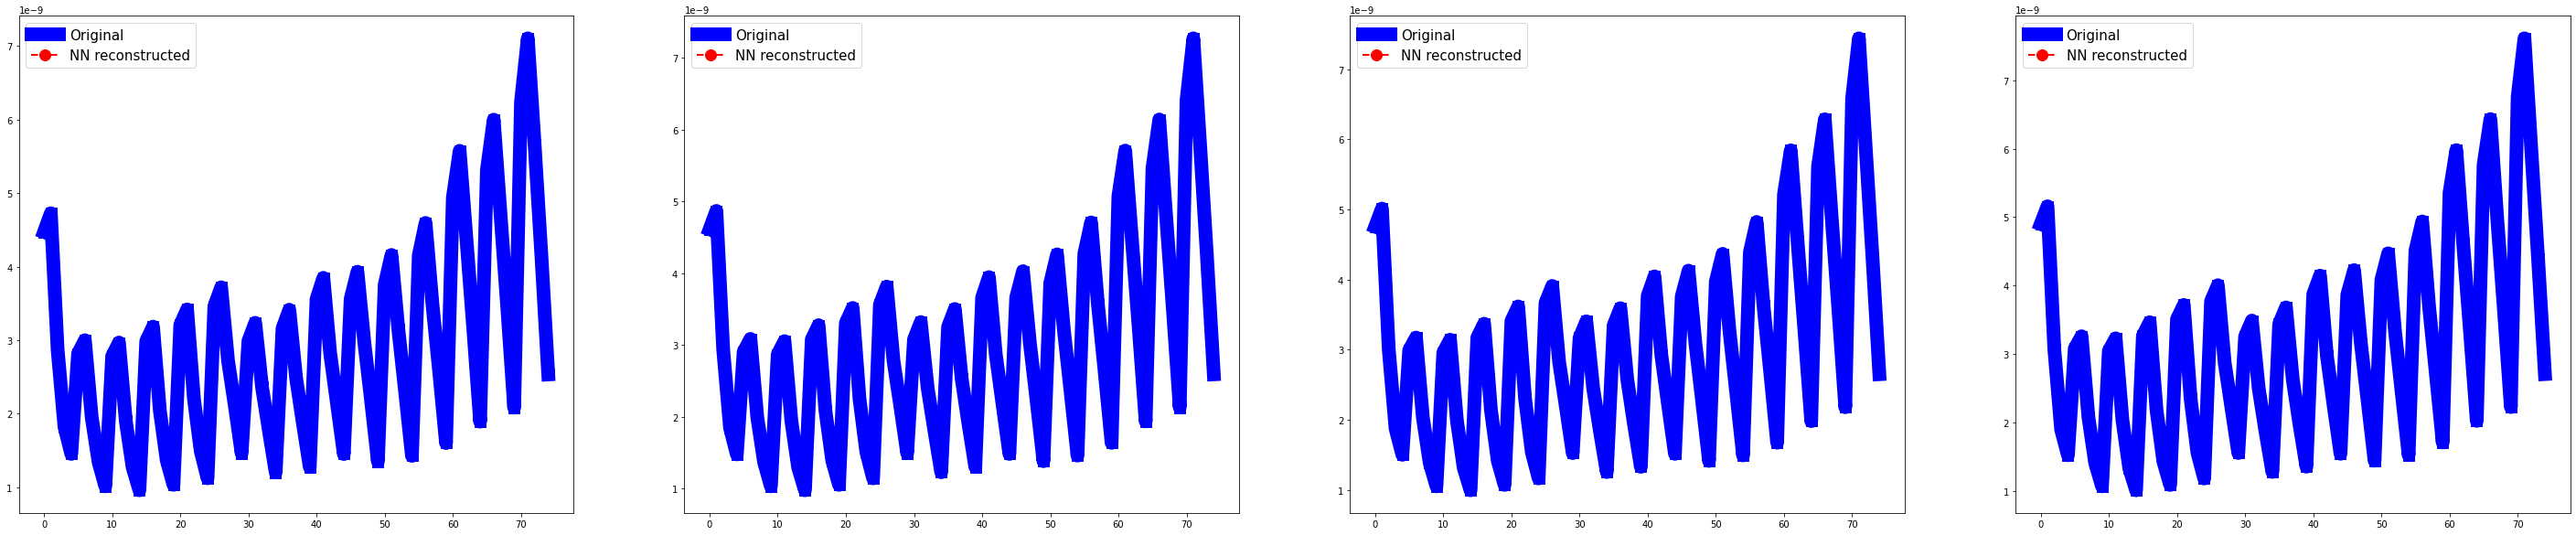

In [288]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.pdf')